In [2]:
from google.colab import files
uploaded = files.upload()


Saving HistoricalQuotes.csv to HistoricalQuotes.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [8]:
file_path =("HistoricalQuotes.csv")
df = pd.read_csv(file_path)
df.head()


,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [9]:
df.columns = [col.strip().lower().replace('/', '_') for col in df.columns]

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
if 'close' not in df.columns and 'close_last' in df.columns:
    df.rename(columns={'close_last': 'close'}, inplace=True)

df['close'] = df['close'].replace('[\$,]', '', regex=True).astype(float)
df = df.sort_index()


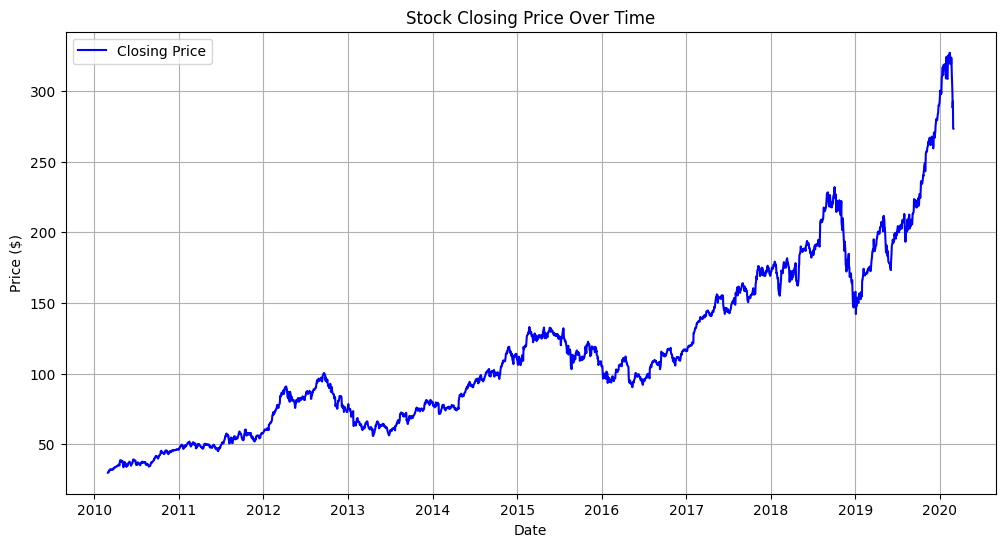

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['close'], label='Closing Price', color='blue')
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend()
plt.show()


In [11]:
df['prediction'] = df['close'].shift(-1)
df.dropna(inplace=True)

X = np.array(df[['close']])
y = np.array(df['prediction'])


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
model.predict(X_test)


array([187.0685698 ,  57.47147194, 110.48919066,  72.35480403,
       139.37553765,  35.44991571,  38.02784433,  94.80860341,
        53.86443589, 120.10795344, 157.97181237,  45.34070913,
       172.46007382, 147.25089968, 117.25238324, 104.3171512 ,
       204.80316368, 109.09647396, 163.25211236,  95.34675314,
       209.18170466,  95.30958063, 181.97864116, 220.13306688,
        75.00567493, 108.11455859, 100.9004865 ,  80.61802263,
       156.04805981,  43.96512586, 212.95907296, 127.00140011,
       149.69566856, 112.60331456,  86.49668982, 178.37160511,
        50.3045919 , 161.27826208, 109.36700166, 108.48528174,
       154.32469815,  95.04907248,  49.73778627,  63.54622161,
        90.32125018,  93.01510493, 163.13187782,  98.78065146,
        37.27497575, 116.63117148, 111.92198553,  47.43048554,
       178.90264097, 227.21688489, 310.84000386,  88.75249008,
        83.67829213,  84.56572319,  65.10065376,  53.32197775,
        79.23672821, 132.23160237, 210.83492952, 227.35

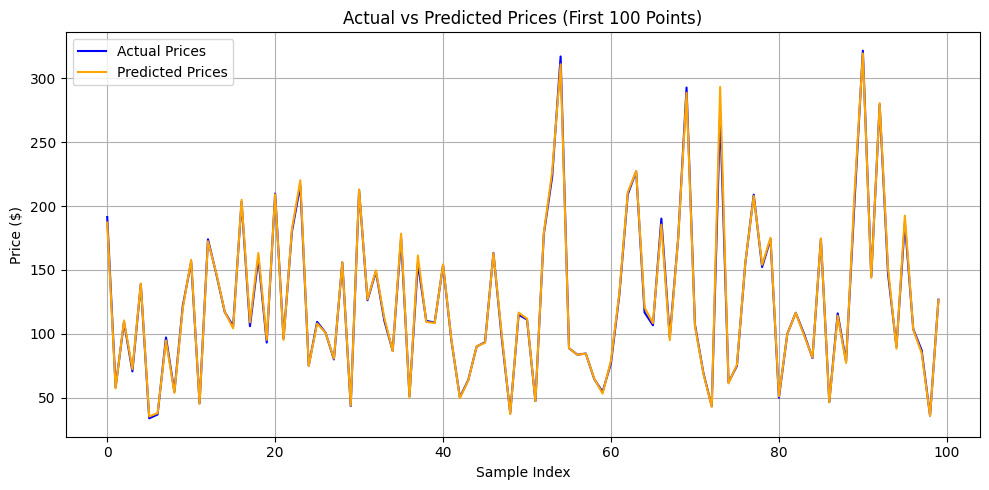

In [16]:
plt.figure(figsize=(10,5))
plt.plot(y_test[:100], label="Actual Prices", color="blue")
plt.plot(predictions[:100], label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Prices (First 100 Points)")
plt.xlabel("Sample Index")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
recent_price = np.array(df[['close']].tail(1))
next_day_prediction = model.predict(recent_price)
print(f"Predicted next day's closing price: ${next_day_prediction[0]:.2f}")


Predicted next day's closing price: $273.96


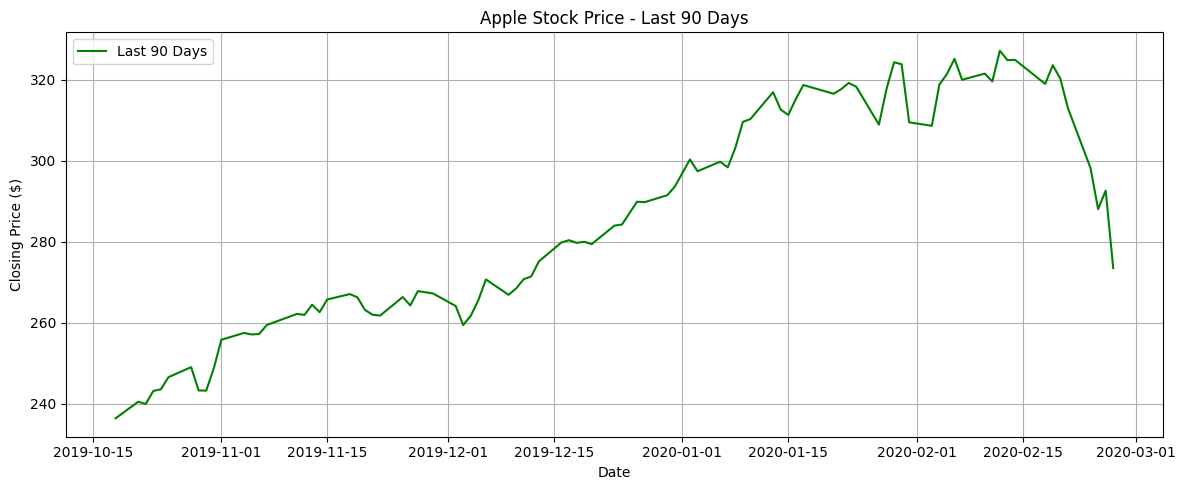

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df.index[-90:], df['close'][-90:], label="Last 90 Days", color="green")
plt.title("Apple Stock Price - Last 90 Days")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
